<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use the `OpenAI` LLM abstraction with GPT4V for image understanding/reasoning.

We also show several functions that are currently supported in the `OpenAI` LLM class when working with GPT4V:
* `complete` (both sync and async): for a single prompt and list of images
* `chat` (both sync and async): for multiple chat messages
* `stream complete` (both sync and async): for steaming output of complete
* `stream chat` (both sync and async): for steaming output of chat

In [ ]:
%pip install llama-index-llms-openai matplotlib

##  Use GPT4V to understand Images from URLs

In [ ]:
import os

OPENAI_API_KEY = "sk-..."  # Your OpenAI API token here
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

## Initialize `OpenAIMultiModal` and Load Images from URLs

## 

In [ ]:
from llama_index.llms.openai import OpenAI

image_urls = [
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://i2-prod.mirror.co.uk/incoming/article7160664.ece/ALTERNATES/s1200d/FIFA-Ballon-dOr-Gala-2015.jpg",
]

openai_llm = OpenAI(model="gpt-4o", max_new_tokens=300)

https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg


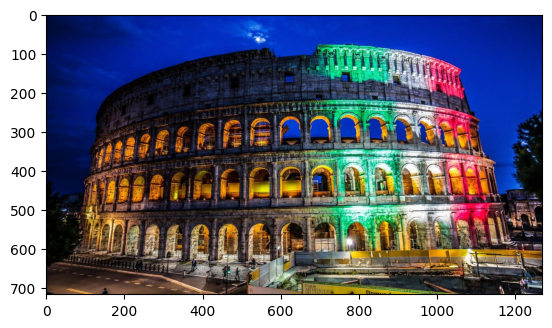

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Ask the model to describe what it sees

In [ ]:
from llama_index.core.llms import (
    ChatMessage,
    ImageBlock,
    TextBlock,
    MessageRole,
)

msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the images as an alternative text"),
        ImageBlock(url=image_urls[0]),
        ImageBlock(url=image_urls[1]),
    ],
)

response = openai_llm.chat(messages=[msg])

In [ ]:
print(response)

assistant: **Image 1:** The Colosseum in Rome is illuminated at night with the colors of the Italian flag: green, white, and red. The ancient amphitheater stands prominently against a deep blue sky, with some clouds visible. The foreground shows a construction area with barriers and a few people walking nearby.

**Image 2:** A line graph titled "The U.S. Mortgage Rate Surge" compares the U.S. 30-year fixed-rate mortgage (in red) with existing home sales (in blue) from 2014 to 2023. The mortgage rate line shows a significant increase, reaching its highest level in over 20 years. Existing home sales fluctuate, with a notable decline in recent years. A text box highlights that in 2023, high mortgage rates and rising home prices have led to the lowest housing affordability since 1989.


We can also stream the model response asynchronously

In [ ]:
async_resp = await openai_llm.astream_chat(messages=[msg])
async for delta in async_resp:
    print(delta.delta, end="")

**Image 1:** The Colosseum in Rome is illuminated at night with the colors of the Italian flag: green, white, and red. The ancient structure stands prominently against a deep blue sky, with some clouds visible. The lower part of the image shows a construction area with barriers and a few people walking nearby.

**Image 2:** A line graph titled "The U.S. Mortgage Rate Surge" compares the U.S. 30-year fixed-rate mortgage (in red) with existing home sales (in blue) from 2014 to 2023. The graph shows mortgage rates rising sharply in recent years, while home sales fluctuate. A note highlights that in 2023, high mortgage rates and rising home prices have led to the lowest housing affordability since 1989.

##  Use GPT4V to understand images from local files

In [ ]:
%pip install llama-index-readers-file

In [ ]:
from pathlib import Path
import shutil

import requests

img_path = Path().resolve() / "image.jpg"
response = requests.get(image_urls[-1])
with open(img_path, "wb") as file:
    file.write(response.content)

msg = ChatMessage(
    role=MessageRole.USER,
    blocks=[
        TextBlock(text="Describe the image as an alternative text"),
        ImageBlock(path=img_path, image_mimetype="image/jpeg"),
    ],
)

response = openai_llm.chat(messages=[msg])

In [ ]:
print(response)

assistant: A person in a black tuxedo and bow tie is holding a golden soccer ball trophy on a stage. The background is a warm yellow color with spotlights shining upwards.
